# E02-1.손글씨 분류기 제작

## 루브릭 평가기준
>**1. 3가지 데이터셋 구성이 합리적으로 진행되었는가?<br>2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?<br>3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?**

## 실습 start

### 모듈 임포트
**데이터 정상 로드되었는지 확인**

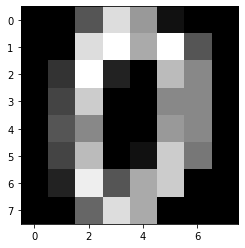

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

digits = load_digits()
digits.data.shape

plt.gray()
plt.imshow(digits.images[0])

### 데이터 살펴보기
**데이터 키값 확인**

In [2]:
dir(digits)
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

**데이터 샘플 확인**

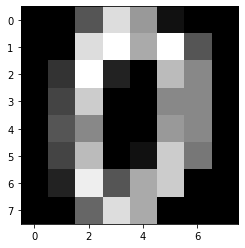

In [3]:
digits_data = digits.data
plt.imshow(digits.images[0])

**레이블 확인 (타겟을 레이블로 할당)**

In [4]:
digits_label = digits.target
digits_label.shape

(1797,)

**할당된 레이블 확인**

In [5]:
digits_label

array([0, 1, 2, ..., 8, 9, 8])

**각 타겟 이름 확인**

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**데이터셋에 대한 설명 확인**

In [25]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**feature 이름들 확인<br>이미지 데이터이기 때문에 픽셀값을 나타내고 큰 의미는 없음**

In [8]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

### 데이터를 학습에 용이하도록 train, test 분류

**판다스 버전 확인**

In [9]:
import pandas as pd
pd.__version__

'1.3.3'

**학습데이터 데이터프레임에 할당**

In [10]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


**타겟을 레이블에 할당**

In [11]:
digits_df["label"] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=7)

print("X_train 갯수: ", len(X_train), "X_test 갯수: ", len(X_test))

X_train.shape, y_train.shape
X_test.shape, y_test.shape
y_train, y_test

X_train 갯수:  1437 X_test 갯수:  360


(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

### 모델 학습

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)


classifier


DecisionTreeClassifier(random_state=32)

### 모델 평가

In [19]:
y_pred = decision_tree.predict(X_test)
y_pred

y_test

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.97      0.94      0.96        36
           2       0.93      0.83      0.88        30
           3       0.89      0.98      0.93        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       0.91      1.00      0.96        32
           7       1.00      0.93      0.96        40
           8       0.95      0.90      0.93        42
           9       0.90      0.93      0.92        29

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### RandomForest 모델 사용

In [15]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



### SVM 모델 사용

In [16]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SGD Classifier 모델 사용

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        30
           3       0.97      0.93      0.95        41
           4       1.00      0.97      0.98        32
           5       0.94      0.98      0.96        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.91      0.98      0.94        42
           9       0.96      0.90      0.93        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Logistic regression 모델 사용

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        41
           4       0.94      0.97      0.95        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.95      0.98        42
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix 선택

##### 데이터셋의 특성을 고려하여 적절한 평가지표를 선정해보자
>**confusion matrix에 대한 이해가 충분하지 않은 것 같지만, 정보보안에서 anomoly detection분야를 공부할 때 활용된 개념이기도 하다. 그래서 나는 해당 데이터셋에서 오탐지(FP, False Positive), 미탐지(FN, False Negative)의 중요도를 척도로 삼기로 했다.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$Precision = \frac{TP}{TP+FP}$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$Recall = \frac{TP}{TP + FN}$<br><br>
아래 수식에 따르면 Precision(정밀도)가 높을 경우 FP, 즉 오탐률이 낮은 것으로 판단할 수 있고, Recall이 높을 경우 FN인 미탐률이 낮다고 판단할 수 있다.<br><br>
그 외 데이터셋이 불균형할 경우 f1-score을 지표로 사용할 수 있다고 하는데 정확히 이해하지 못했으니 넘어가자.**

#### 의사결정나무 모델의 CM

In [20]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.72      0.81        36
           2       0.96      0.73      0.83        30
           3       0.74      0.83      0.78        41
           4       0.80      0.88      0.84        32
           5       0.90      0.93      0.91        46
           6       0.93      0.88      0.90        32
           7       0.90      0.93      0.91        40
           8       0.77      0.81      0.79        42
           9       0.69      0.76      0.72        29

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



#### RandForest 모델의 CM

In [21]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



#### SVM 모델의 CM

In [22]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### SGD Classifier 모델의 CM

In [23]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.94      0.86      0.90        36
           2       1.00      0.93      0.97        30
           3       0.91      1.00      0.95        41
           4       0.97      0.97      0.97        32
           5       0.98      1.00      0.99        46
           6       1.00      0.97      0.98        32
           7       0.91      1.00      0.95        40
           8       0.95      0.93      0.94        42
           9       1.00      0.93      0.96        29

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



#### Logistic regression 모델의 CM

In [24]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        41
           4       0.94      0.97      0.95        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.95      0.98        42
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**숫자분류모델은 의외로 단순하게 생각해도 될 것 같다.<br>
아홉개의 숫자를 모두 정확하게 분류해야만 이 모델을 어디에 사용하더라도 올바르게 사용될 수 있다.<br>
그러므로 해당 모델은 accuracy를 평가지표로 사용하고, 가장 높은 수치를 보여준 SVM을 쓰면 되겠다.**

# E02-2. 와인 분류기 제작

## 실습 start

## 모듈 임포트
**데이터 정상 로드되었는지 확인**

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


### 데이터 살펴보기
**데이터 키값 확인**

In [2]:
dir(wine)
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

**데이터 샘플 확인**

In [3]:
wine_data = wine.data
print(wine_data.shape)

(178, 13)


**레이블 확인 (타겟을 레이블로 할당)**

In [4]:
wine_label = wine.target
wine_label.shape

(178,)

**할당된 레이블 확인**

In [5]:
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**각 타겟 이름 확인**

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

**데이터셋에 대한 설명 확인**

In [25]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**feature 이름들 확인<br>이미지 데이터이기 때문에 픽셀값을 나타내고 큰 의미는 없음**

In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### 데이터를 학습에 용이하도록 train, test 분류

**판다스 버전 확인**

In [9]:
import pandas as pd
pd.__version__

'1.3.3'

**학습데이터 데이터프레임에 할당**

In [10]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**타겟을 레이블에 할당**

In [11]:
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=7)

print("X_train 갯수: ", len(X_train), "X_test 갯수: ", len(X_test))

X_train.shape, y_train.shape
X_test.shape, y_test.shape
y_train, y_test

X_train 갯수:  142 X_test 갯수:  36


(array([2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,
        0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
        1, 1, 0, 2, 1, 1, 2, 1, 0, 2]),
 array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1]))

### 모델 학습

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)


classifier


DecisionTreeClassifier(random_state=32)

### 모델 평가

In [19]:
y_pred = decision_tree.predict(X_test)
y_pred

y_test

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



### RandomForest 모델 사용

In [15]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM 모델 사용

In [16]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SGD Classifier 모델 사용

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.45      1.00      0.62        10
           2       1.00      0.18      0.31        11

    accuracy                           0.64        36
   macro avg       0.79      0.64      0.58        36
weighted avg       0.81      0.64      0.61        36



### Logistic regression 모델 사용

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix 선택

#### 의사결정나무 모델의 CM

In [20]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



#### RandForest 모델의 CM

In [21]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### SVM 모델의 CM

In [22]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SGD Classifier 모델의 CM

In [23]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78        15
           1       0.47      0.70      0.56        10
           2       0.00      0.00      0.00        11

    accuracy                           0.58        36
   macro avg       0.38      0.54      0.45        36
weighted avg       0.41      0.58      0.48        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Logistic regression 모델의 CM

In [24]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**솔직히 와인에 대해서는 잘 모르겟다.<br>
description을 읽어보니 각 세명의 다른 cultivators(?)으로부터 제작된 와인의 등급을 매기는 삼진분류모델인 것 같다. 그렇다면 제작된 와인의 등급이 낮게 매겨진다면 해당 cultivator에게 불이익이 있을 수 있다는 관점에서는 높은 등급(아마 class_0 ?)에서의 오탐률이 적은 모델을 채택하는게 낫겠지만, 해당 모델을 상용한다면 아마 cultivators로부터 와인을 수주받아 위탁판매하는 유통업자등 일 확률이 매우 높으며, 높은 등급일수록 책정가가 높을 것을 생각한다면 오히려 class_2의 미탐률이 낮은 모델을 채택하는 것이 나을지도 모른다. 물론 모든 사람들이 정직하게 살길 원하고 이타적이라는 성선설을 전제로 깔고 긍정적으로 생각하자면, 앞서 말한 높은 등급의 오탐률이 낮은(precision이 높은) 모델을 채택하는 것이 좋겠다.**<br><br>

**상기의 모델 cm을 보고 판단할 때는 앞전의 내용 모두 필요없이 완벽하게 분류해내는 RandomForest나 Logistic Regression 모델을 사용하면 되겠다.**

# E02-3. 암 여부 분류기 제작

## 실습 start

### 모듈 임포트
**데이터 정상 로드되었는지 확인**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

cancer = load_breast_cancer()

print(dir(cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


### 데이터 살펴보기
**데이터 키값 확인**

In [2]:
dir(cancer)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**데이터 샘플 확인**

In [3]:
cancer_data = cancer.data
print(cancer_data.shape)

(569, 30)


**레이블 확인 (타겟을 레이블로 할당)**

In [4]:
cancer_label = cancer.target
cancer_label.shape

(569,)

**할당된 레이블 확인**

In [5]:
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**각 타겟 이름 확인**

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

**데이터셋에 대한 설명 확인**

In [21]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**feature 이름들 확인<br>이미지 데이터이기 때문에 픽셀값을 나타내고 큰 의미는 없음**

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 데이터를 학습에 용이하도록 train, test 분류

**판다스 버전 확인**

In [9]:
import pandas as pd
pd.__version__

'1.3.3'

**학습데이터 데이터프레임에 할당**

In [10]:
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**타겟을 레이블에 할당**

In [11]:
cancer_df["label"] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=7)

print("X_train 갯수: ", len(X_train), "X_test 갯수: ", len(X_test))

X_train.shape, y_train.shape
X_test.shape, y_test.shape
y_train, y_test

X_train 갯수:  455 X_test 갯수:  114


(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 

### 모델 학습

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)


classifier


DecisionTreeClassifier(random_state=32)

### 모델 평가

In [19]:
y_pred = decision_tree.predict(X_test)
y_pred

y_test

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### RandomForest 모델 사용

In [15]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### SVM 모델 사용

In [16]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        39
           1       0.87      0.97      0.92        75

    accuracy                           0.89       114
   macro avg       0.90      0.85      0.86       114
weighted avg       0.89      0.89      0.88       114



### SGD Classifier 모델 사용

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.96      0.69      0.81        39
           1       0.86      0.99      0.92        75

    accuracy                           0.89       114
   macro avg       0.91      0.84      0.86       114
weighted avg       0.90      0.89      0.88       114



### Logistic regression 모델 사용

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.96      0.94        75

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix 선택

#### 의사결정나무 모델의 CM
                precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.96      0.94        75
        accuracy                       0.92       114
       macro avg   0.92      0.90      0.91       114
      weighted avg 0.92      0.92      0.92       114

#### RandForest 모델의 CM
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
    macro avg      0.97      0.97      0.97       114
    weighted avg   0.97      0.97      0.97       114

#### SVM 모델의 CM
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        39
           1       0.87      0.97      0.92        75

    accuracy                           0.89       114
    macro avg      0.90      0.85      0.86       114
    weighted avg   0.89      0.89      0.88       114

#### SGD Classifier 모델의 CM
              precision    recall  f1-score   support

           0       0.96      0.69      0.81        39
           1       0.86      0.99      0.92        75

    accuracy                           0.89       114
    macro avg      0.91      0.84      0.86       114
    weighted avg   0.90      0.89      0.88       114


#### Logistic regression 모델의 CM
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.96      0.94        75

    accuracy                           0.92       114
    macro avg      0.92      0.90      0.91       114
    weighted avg   0.92      0.92      0.92       114


**결론부터 말하자면 암 발생 여부를 판단하는 모델의 특성 상 recall을 평가지표로 판단할 수 밖에 없다.<br>
개인적으로는 라벨링을 잘못 붙인 것 같지만 target_name을 확인했을 때 label 0 : maligant, 즉 악성종양인 암인 것을 알 수 있다. 그러므로 악성종양을 탐지하지 못하고 지나갈 경우 환자의 생명에 치명적인 위협을 초래할 수 있다. 반대로 악성이 아닌 것을 악성으로 판단할 경우에는 가벼운 해프닝으로 끝날 가능성이 높다.**<br><br>
**Recall을 평가지표로 사용했을 때 모델들이 모두 전체적으로 label(0)인 maligant에 대한 미탐률이 가장 높은 것을 알 수 있다.(재현도가 낮을수록 미탐률은 높은 것으로 본다.) 다른 수치를 모두 재쳐놓더라도 악성종양에 대한 미탐률이 가장 낮은 RandomForest모델을 사용하는 것이 가장 바람직하겠다.**

# 회고

## E02를 마치며.
**3가지 다른 데이터셋을 5가지 다른 알고리즘의 모델을 통해 분석해보는 프로젝트였다. 솔직히 scikitlearn에 데이터가 모두 저장되어있고 모델도 구조가 모두 비슷해서 E01보다 오히려 쉽게 끝낸 것 같다.**
### 아쉬움이 남음
**프로젝트 자체는 뭔가 '뚝딱'하고 끝난 기분이지만 오히려 찝찝함이 많이 남는 프로젝트다. 1차적으로 사용된 알고리즘 5개 대한 이해가 전혀 반영되지 않은 상황에서 코드만으로 완성된 느낌. 개인적으로 공부한 책에서 k-최근접 이웃 알고리즘을 통해 iris-classifier를 제작해보는 실습을 했었는데 iris만 보고 같은 내용이라고 생각했는데 오히려 다른 접근이라 좋았는데 어떻게든 진도를 맞춰야 하는 입장으로써 모든 개념을 정리할 시간이 없었다.**
### 또 보자
**그래도 나름 다행이라면 기억 저편으로 사라져가던 Confusion Matrix의 개념을 다시 돌아보고 꼴에 두번째라고 코드를 보는 것에 조금은 익숙해진듯한 나의 모습이랄까. 아직도 written과 실습노드들을 계속 오락가락하면 ctrl+c, ctrl+v를 하고있는 건 마찬가지지만 이렇게라도 쭉 지속하다보면 어느정도는 내손으로 타이핑 할 수 있는 때가 올 것 같다. 그리고 지금 당장 못봤더라도 노드가 날아가진 않을테니 내 숨통이 트이는 날 다시 보러 오리라. 그것도 아니라면 어차피 이 과정 중에 너희들 중 몇놈은 다시 만나겠지 뭐.**
##### ps. 뭔가 실질적인 내용에 비해 보고서의 길이가 쓸데없이 긴 것 같다. 내가 봐도 어지러울 정도로 가독성도 떨어지고. 주피터도 언젠가는 익숙해질려나.